## This notebook will analyze the Maternity health data from the dataset.

#### There are several way to analyze the data. Health data analysis can include several things, we will try to follow the best practice in the industry

##### We need to import the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Lets import the maternity health data

In [2]:
data = pd.read_csv('MaternalHealthRiskData.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [5]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

##### Now we will convert "High Risk" and "Low Risk" to categorical value for better analysis

In [7]:
def risk_to_numeric(x):
    if x == 'high risk' : return 1
    if x == 'low risk' : return 0

data['RiskLevel'] = data['RiskLevel'].apply(risk_to_numeric)
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1.0
1,35,140,90,13.0,98.0,70,1.0
2,29,90,70,8.0,100.0,80,1.0
3,30,140,85,7.0,98.0,70,1.0
4,35,120,60,6.1,98.0,76,0.0


In [8]:
corr = data.corr()
print(corr)

                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798   
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108   
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151   
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867   
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771   
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000   
RiskLevel    0.330881    0.451916     0.415135  0.666815  0.195189   0.224614   

             RiskLevel  
Age           0.330881  
SystolicBP    0.451916  
DiastolicBP   0.415135  
BS            0.666815  
BodyTemp      0.195189  
HeartRate     0.224614  
RiskLevel     1.000000  


##### We can see the corelation between the different value

/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


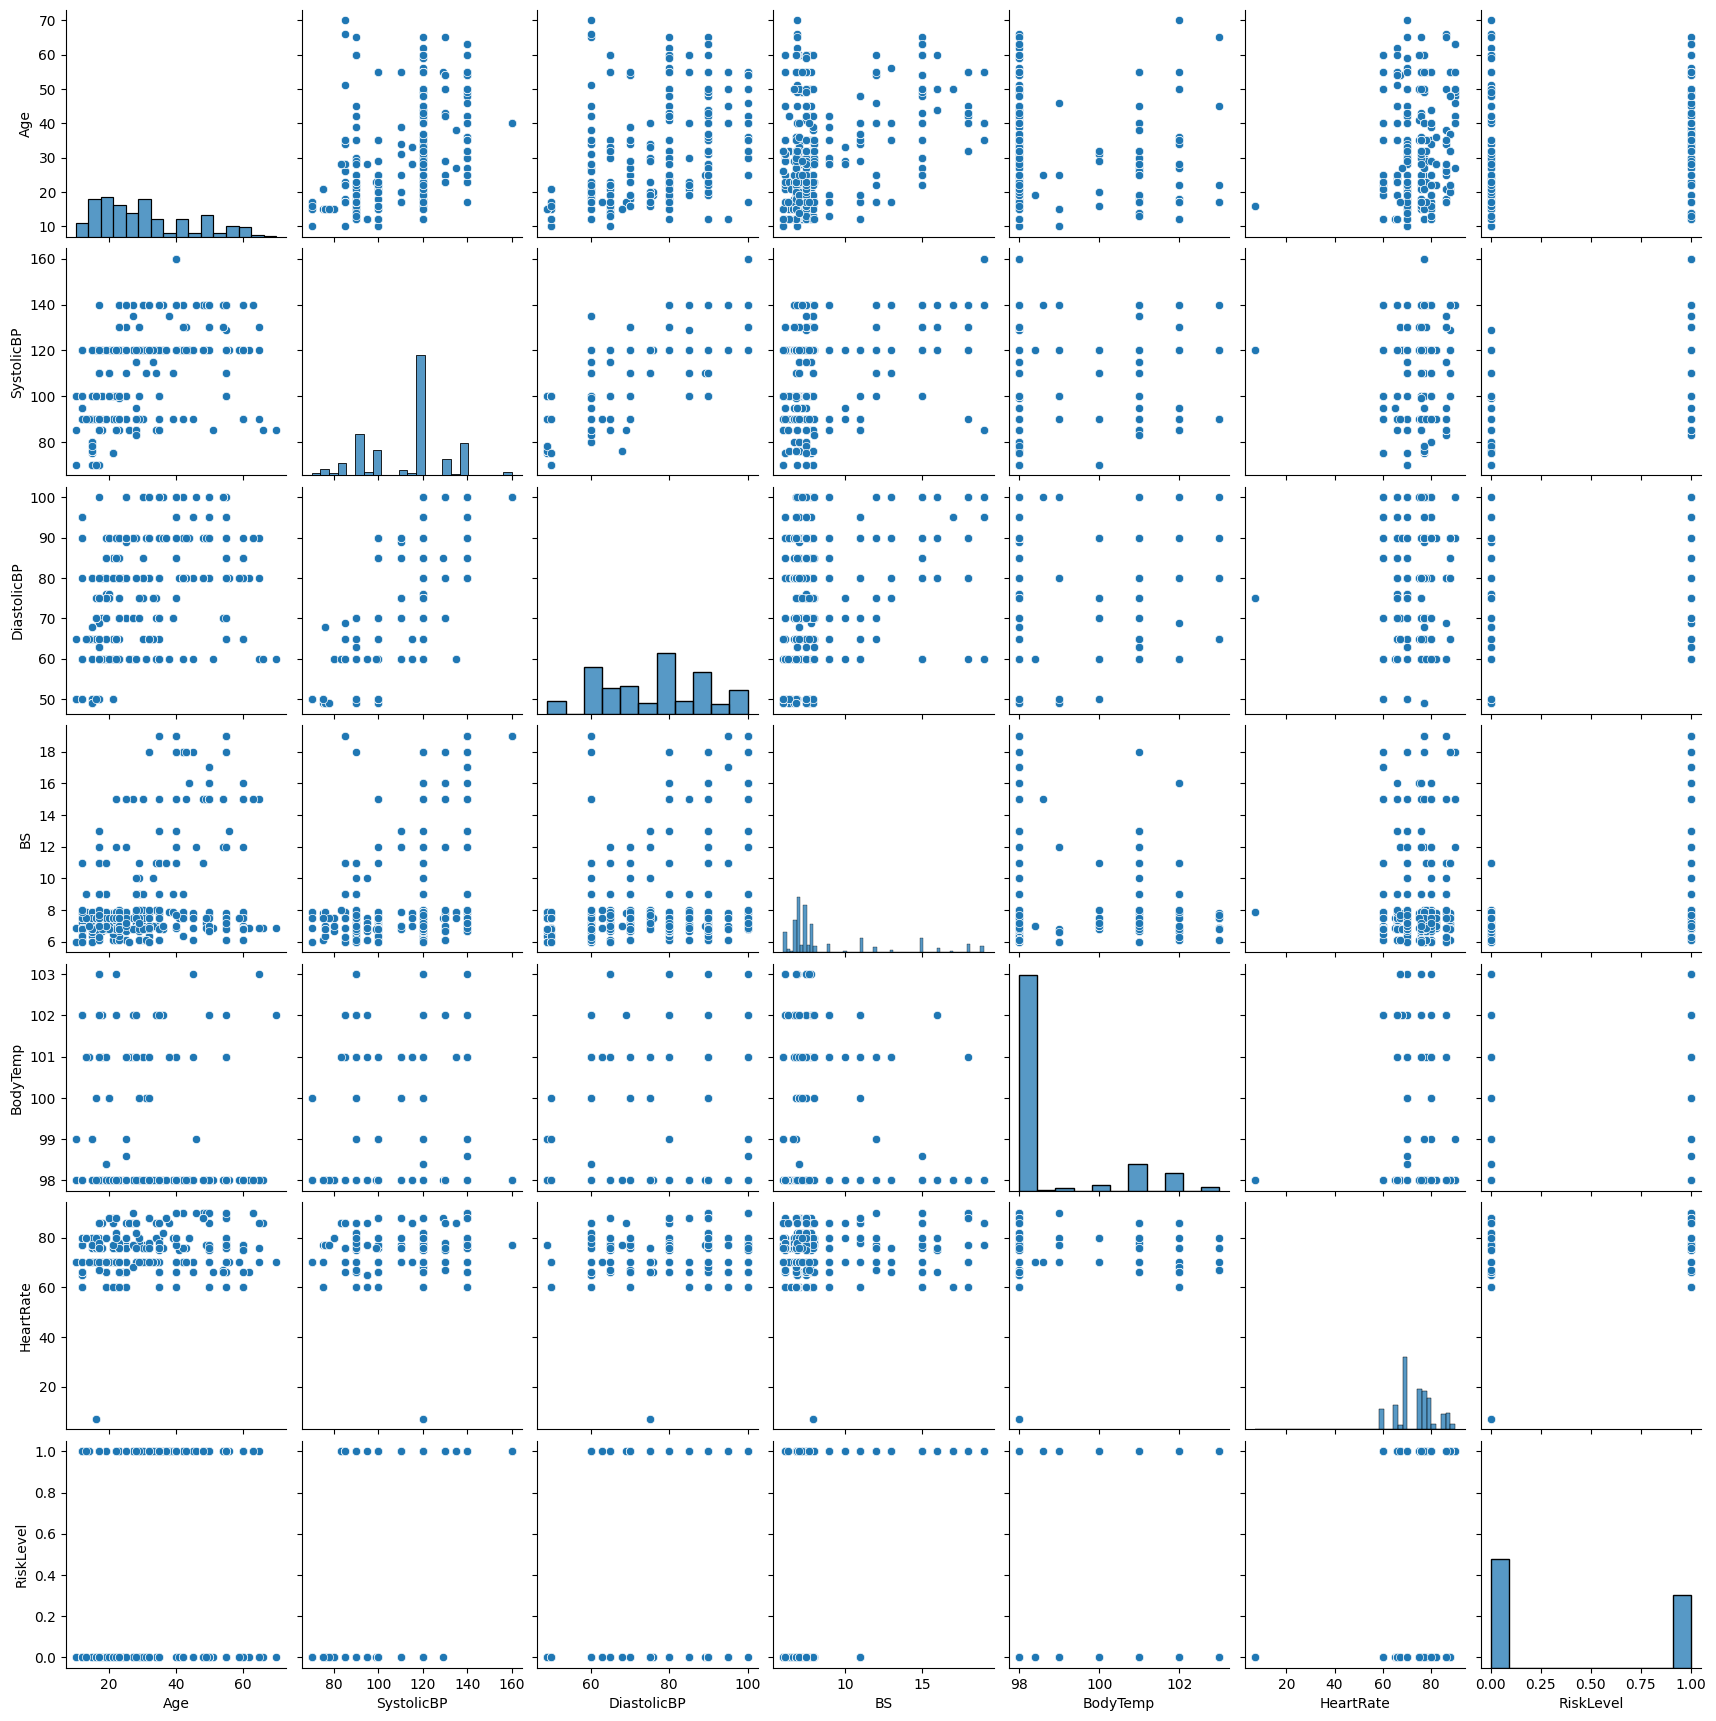

In [9]:
sns.pairplot(data=data)

<Axes: >

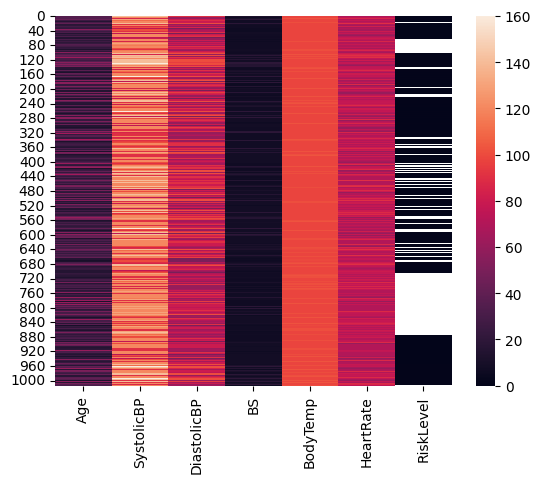

In [10]:
sns.heatmap(data=data)

In [11]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1.0
1,35,140,90,13.0,98.0,70,1.0
2,29,90,70,8.0,100.0,80,1.0
3,30,140,85,7.0,98.0,70,1.0
4,35,120,60,6.1,98.0,76,0.0


In [12]:
# Most frequent age in the group
data["Age"].mode()

0    23
Name: Age, dtype: int64

In [13]:
# Risk level in the dataset
data["RiskLevel"].value_counts()

RiskLevel
0.0    406
1.0    272
Name: count, dtype: int64

#### So the most used age is 23 and there are more non risk patient than risk on. Almost double

/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


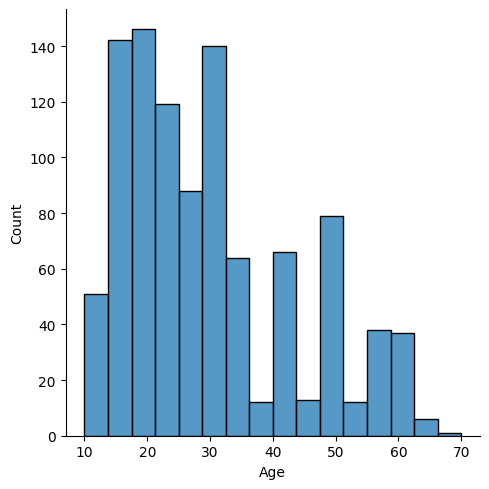

In [14]:
sns.displot(data=data["Age"])  # Age distribution in the group

In [15]:
data["Age"].describe()

count    1014.000000
mean       29.871795
std        13.474386
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        70.000000
Name: Age, dtype: float64

/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


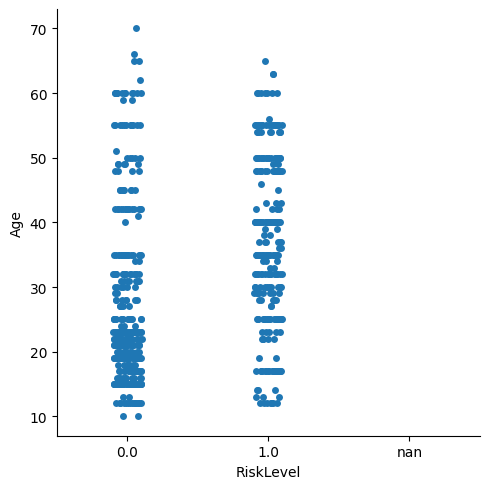

In [16]:
# Lets plot age vs risk to see what is it like

sns.catplot(data=data, x="RiskLevel", y="Age")

### So we can see the most of the no risk are in 15 to 25 years of age. And risk level increase in around 30 to 43.

#### We will add box plot for age to better understand the distribution of age

<Axes: xlabel='Age'>

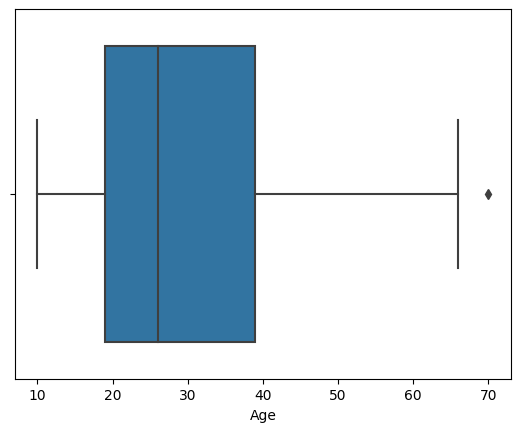

In [18]:
sns.boxplot(x=data["Age"])

### So, we can see that 20 to 40 years age is the 50% data and the rest 10 to 20 years of age in the 25% and the above 40 is in the 25% 

In [19]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['Age'].mean()))
print("Median: {}".format(data['Age'].median()))
print("Mode: {}".format(data['Age'].mode()))

Mean: 29.871794871794872
Median: 26.0
Mode: 0    23
Name: Age, dtype: int64


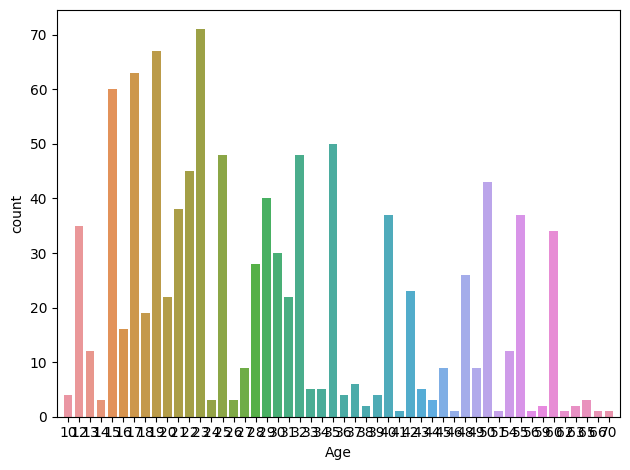

<Figure size 3000x1000 with 0 Axes>

In [45]:
# a frequency plot for each age group
ax = sns.countplot(data=data, x="Age")
ax.set_xlim(-1, 50)
plt.tight_layout()
fig = plt.figure()
fig.set_size_inches(30,10)
plt.show()

In [46]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,1.0
1,35,140,90,13.0,98.0,70,1.0
2,29,90,70,8.0,100.0,80,1.0
3,30,140,85,7.0,98.0,70,1.0
4,35,120,60,6.1,98.0,76,0.0


#### Let's analyze the data for specific age.

In [50]:
data_25 = data.query("Age == 25")
data_25.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,1.0
12,25,110,89,7.01,98.0,77,0.0
17,25,140,100,7.01,98.0,80,1.0
42,25,90,70,6.10,98.0,80,0.0
50,25,120,80,7.00,98.0,66,0.0


In [52]:
data_25.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SystolicBP,NaN,1.000000,0.749884,0.170229,-0.063298,0.265438,0.697786
DiastolicBP,NaN,0.749884,1.000000,0.055541,0.012014,0.284551,0.654441
BS,NaN,0.170229,0.055541,1.000000,0.095546,0.221163,0.419294
BodyTemp,NaN,-0.063298,0.012014,0.095546,1.000000,0.309347,-0.006937
HeartRate,NaN,0.265438,0.284551,0.221163,0.309347,1.000000,0.550052
RiskLevel,NaN,0.697786,0.654441,0.419294,-0.006937,0.550052,1.000000


/media/blackcat/DataDrive/Projects/DataProjects/BangladeshEconomicDataAnalysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


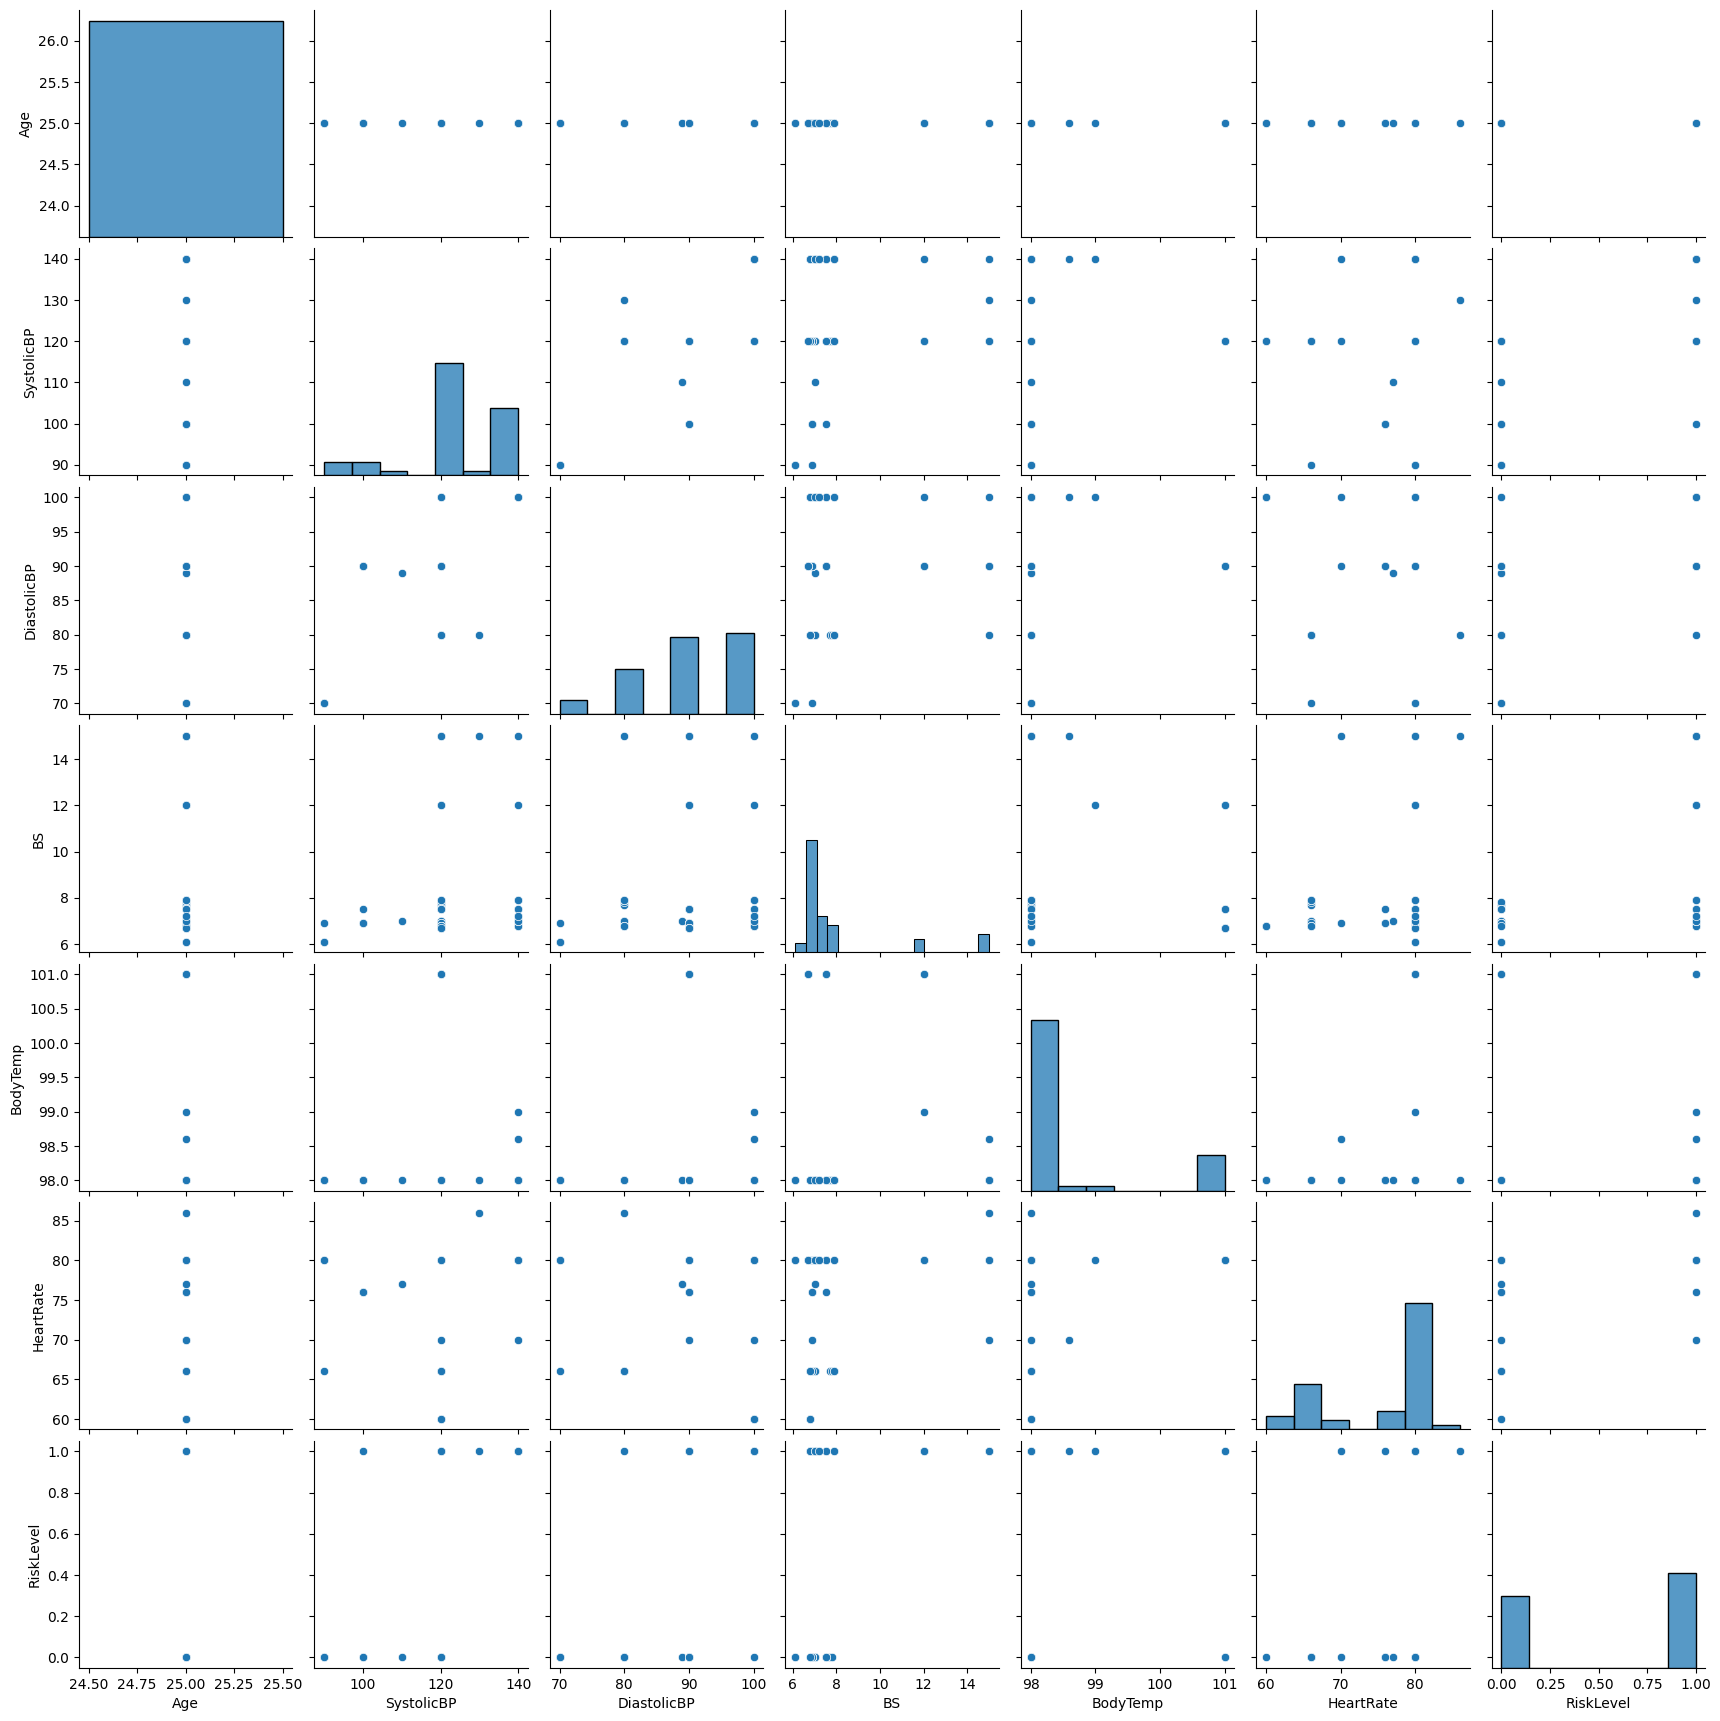

In [51]:
sns.pairplot(data=data_25)